In [1]:
!pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py
!pip install atari-py
!pip install opence-python

Looking in links: https://github.com/Kojoley/atari-py/releases


ERROR: Could not find a version that satisfies the requirement opence-python (from versions: none)
ERROR: No matching distribution found for opence-python


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym

%matplotlib inline

In [3]:
# task name
ENV = 'Breakout-v0'

# environment setting
env = gym.make(ENV)

In [4]:
# task에서 관측할 수 있는 상태와 선택 가능한 행동 파악

# 상태
print(env.observation_space)

# 행동
print(env.action_space)

# ['NOOP', 'FIRE', 'RIGHT', 'LEFT'] : [아무 것도 하지 않음, 공 발사, 오른쪽 이동, 왼쪽 이동]
print(env.unwrapped.get_action_meanings())

Box(0, 255, (210, 160, 3), uint8)
Discrete(4)
['NOOP', 'FIRE', 'RIGHT', 'LEFT']


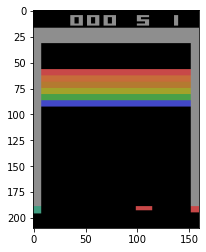

In [5]:
# 초기 상태 이미지 출력

# environment reset
observation = env.reset()

# image show
plt.imshow(observation)

In [6]:
# 애니메이션을 만드는 함수
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)

    anim.save('breakout_implementation.gif')  # 애니메이션을 저장하는 부분

In [7]:
# 무작위 플레이
frames = []
observation = env.reset()

for step in range(1000):
    
    # 이미지 저장
    frames.append(observation)
    
    # 행동 선택
    action = np.random.randint(0, 4)
    
    # 행동 실행
    observation_next, reward, done, info = env.step(action)
    
    # 상태 업데이트
    observation = observation_next
    
    if done:
        break

MovieWriter ffmpeg unavailable; using Pillow instead.


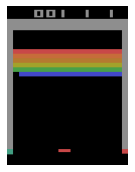

In [8]:
display_frames_as_gif(frames)